In [1]:
import pandas as pd
import re

/Users/zmoad/opt/miniconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/zmoad/opt/miniconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df = pd.read_csv('./data/clinical.txt', index_col="SampleID",sep = "\t")
df

,PatientID,pCR_consensus,RCB_consensus,HER2_Status,ER_Status,T,N,Ki.67,Age,Chemo,...,ccre_CTCF,meth_wholegenome_CpG_mean,Methylation,WES,RNA,ProteinTumor,RelapseFreeSurvival,RelapseStaus,OverallSurvival,Vital_status_0forliving
SampleID,,,,,,,,,,,,,,,,,,,,,
PS001_T,PS001,RD,RCB_2,Pos,Neg,T3,N3,0.30,38,TCb,...,0.677560,0.794687,1,1,1,1,78.0,0,78.0,0
PS002_T,PS002,RD,RCB_1,Neg,Neg,T1b,N1,0.70,67,TCb,...,0.624815,0.716488,1,1,1,1,80.0,0,80.0,0
PS003_T,PS003,RD,RCB_1,Pos,Pos,T2,N1,0.20,35,EC-T,...,0.611415,0.719768,1,0,1,1,30.0,1,53.0,0
PS004_T,PS004,pCR,pCR,Neg,Neg,T2,N1,0.75,52,TCb,...,0.679594,0.786285,1,1,1,1,40.0,1,120.0,0
PS005_T,PS005,pCR,pCR,Pos,Neg,T2,N1,0.30,45,EC-T,...,0.622671,0.749246,1,1,0,1,70.0,0,70.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PS145_T,PS145,pCR,pCR,Neg,Neg,T2,N0,0.90,54,EC-T,...,0.575131,0.668661,1,1,1,1,43.0,0,43.0,0
PS146_T,PS146,RD,RCB_3,Neg,Neg,T2,N1,0.90,55,EC-T,...,0.651538,0.753112,1,1,1,1,27.0,1,46.0,0
PS147_T,PS147,pCR,pCR,Pos,Pos,T2,N0,0.70,73,Others,...,0.659613,0.746442,1,1,1,1,31.0,1,43.0,0


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.patches as patches

class colorDf(pd.DataFrame):
    def __init__(self, df, colorDict):
        super().__init__(df)
        self.colorDict = colorDict

def multiLandscape(dfs, figsize = (220,50)):
    # calculate amount of rows for all dataframe
    allRow = 0
    maxNumColor = 1
    for df in dfs: 
        allRow += len(df.index)
        if df.colorDict=='round':
            maxNumColor = 1
        else:
            maxNumColor = max(5*len(df.colorDict.keys()),maxNumColor)

    plt.subplots(figsize = figsize)
    grid = plt.GridSpec(allRow, int(len(dfs[0].columns)+maxNumColor)+1)

    # constants for rectangle 
    xSepDist = 0.5
    ySepDist = 1
    width = 2
    height = 10
    
    rowStart = 0

    for df in dfs:
        # new subplot for current df
        rowEnd = rowStart + len(df.index)
        ax = plt.subplot(grid[rowStart:rowEnd,0:len(df.columns)])
        ax.axis([0,2.5*(len(df.columns)),0,11*len(df.index)])

        xStartPoint = 0
        yStartPoint = 0
        yPoint = yStartPoint

        rIndex = df.index.to_list()
        rIndex.reverse()
        for i in rIndex: #each row (gene)
            xPoint = xStartPoint
            for j in df.columns: #draw one row #number of columns
                if df.colorDict=='round':
                    if df.loc[i,j]!=0:
                        if df.loc[i,j]==1:
                            tempRectangle = patches.Ellipse((xPoint+width/2,yPoint+height/2),width*0.8,height/4,linewidth=5,edgecolor='gray',facecolor='gray')
                        elif df.loc[i,j]==2:
                            tempRectangle = patches.Ellipse((xPoint+width/2,yPoint+height/2),width*0.8,height/4,linewidth=5,edgecolor='gray',facecolor='gray')
                        else:
                            tempRectangle = patches.Ellipse((xPoint+width/2,yPoint+height/2),width*0.8,height/4,linewidth=5,edgecolor='gray',facecolor='gray')
                else:
                    tempRectangle = patches.Rectangle((xPoint,yPoint),width,height,linewidth=0.5,edgecolor='black',facecolor=df.colorDict[str(df.loc[i,j])])
                xPoint = xPoint + width + xSepDist
                ax.add_patch(tempRectangle)
#                 ax.set_aspect('equal')
            yPoint = yPoint + height + ySepDist

        ax.set_frame_on(False) #remove the lines
        plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True) #remove ticks
        xGap = (xPoint - xStartPoint)/len(df.columns)
        yGap = (yPoint - yStartPoint)/len(df.index)

        ax.set_yticks([yStartPoint+(0.5*height)+ySepDist+(y*yGap) for y in range(len(df.index))])
        subIndex = df.index.tolist()
        subIndex.reverse()
        ax.set_yticklabels(subIndex) # draw yticklabels
#         yPoint = yPoint + height
        ax.set_xticks([xStartPoint+(0.5*width)+xSepDist+(x*xGap) for x in range(len(df.columns))])
        ax.set_xticklabels(['' for x in range(len(df.columns))]) # hide xticklabels

#         ax2 = plt.subplot(grid[rowStart:rowEnd,len(df.columns)+1:len(df.columns)+1+maxNumColor])
#         ax2.axis([0,2.5*(maxNumColor),0,11*len(df.index)])
#         xPoint = xStartPoint
#         for i in df.colorDict.keys(): #draw one row #number of columns
#             tempRectangle = patches.Rectangle((xPoint,yPoint-height-ySepDist),width,height,linewidth=0.5,edgecolor='black',facecolor=df.colorDict[i])
#             xPoint = xPoint + 5*width + 5*xSepDist
#             ax2.add_patch(tempRectangle)
            
#         ax2.set_xticklabels(['' for x in range(len(df.columns))]) # hide xticklabels
#         ax2.set_yticklabels(['' for y in range(len(df.columns))]) # hide yticklabels   
#         ax2.set_frame_on(False) #remove the lines
        
        rowStart = rowEnd
    
    ax.set_xticklabels(dfs[0].columns.tolist(), rotation = 90) # draw xticklabels for the last df

In [6]:
df_toshow = df.copy()
# df_toshow.index = df_toshow['ID']
df_toshow = df_toshow.fillna(-1)

In [7]:
def cColorDict(pds, rgb, rev=False):
    c_dict = {}
    c_dict['-1.0'] = 'lightgray'
    for i in pds.unique():
        if rev:
            hex_value = (hex(int(((i-pds.min())/(pds.max()-pds[pds>0].min()))*255))[2:]).upper()
        else:
            hex_value = (hex(int(((pds.max()-i)/(pds.max()-pds[pds>0].min()))*255))[2:]).upper()
        if len(hex_value)==1:
            hex_value = '0'+hex_value
        if i>0:
            if rgb=='r':
                c_dict[str(i)] = '#FF'+hex_value+hex_value
            if rgb=='g':
                c_dict[str(i)] = '#'+hex_value+'FF'+hex_value
            if rgb=='b':
                c_dict[str(i)] = '#'+hex_value+hex_value+'FF'
    return c_dict

In [8]:
df_toshow['Molecular_Subtype'] = df_toshow['ER_Status']+df_toshow['HER2_Status']
df_toshow['RCB'] = df_toshow['RCB_consensus'].map({'pCR':0,'RCB_1':1,'RCB_2':2,'RCB_3':3})
df_toshow = df_toshow.sort_index().sort_values(['Molecular_Subtype', 'RCB', 'Histologic_Grade','T', 'N'], ascending=[0,1,0,0,0])
df_toshow

,PatientID,pCR_consensus,RCB_consensus,HER2_Status,ER_Status,T,N,Ki.67,Age,Chemo,...,Methylation,WES,RNA,ProteinTumor,RelapseFreeSurvival,RelapseStaus,OverallSurvival,Vital_status_0forliving,Molecular_Subtype,RCB
SampleID,,,,,,,,,,,,,,,,,,,,,
PS060_T,PS060,pCR,pCR,Pos,Pos,T2,N1,0.25,46,TCb,...,1,1,1,1,69.0,0,69.0,0,PosPos,0
PS071_T,PS071,pCR,pCR,Pos,Pos,T2,N1,0.30,50,EC-T,...,1,0,1,1,69.0,0,69.0,0,PosPos,0
PS089_T,PS089,pCR,pCR,Pos,Pos,T2,N1,0.40,49,EC-T,...,1,1,0,1,67.0,0,67.0,0,PosPos,0
PS100_T,PS100,pCR,pCR,Pos,Pos,T2,N1,0.70,53,TCb,...,1,0,1,1,60.0,0,60.0,0,PosPos,0
PS016_T,PS016,pCR,pCR,Pos,Pos,T2,N0,0.30,44,EC-T,...,1,1,1,1,77.0,0,77.0,0,PosPos,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PS115_T,PS115,RD,RCB_3,Neg,Neg,T2,N0,0.90,47,EC-T,...,1,1,1,1,21.0,1,61.0,0,NegNeg,3
PS051_T,PS051,RD,RCB_3,Neg,Neg,T1c,N1,0.40,44,Others,...,1,1,1,1,12.0,1,17.0,1,NegNeg,3
PS102_T,PS102,RD,RCB_3,Neg,Neg,T2,N1,0.70,69,TCb,...,1,0,1,1,61.0,0,61.0,0,NegNeg,3


<ipython-input-5-ca3cbf791b62>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.colorDict = colorDict
<ipython-input-5-ca3cbf791b62>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.colorDict = colorDict
<ipython-input-5-ca3cbf791b62>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.colorDict = colorDict
<ipython-input-5-ca3cbf791b62>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.colorDict = colorDict
<ipython-input-5-ca3cbf791b62>:9: UserWarning: Pandas doesn't allow columns to be created via a 

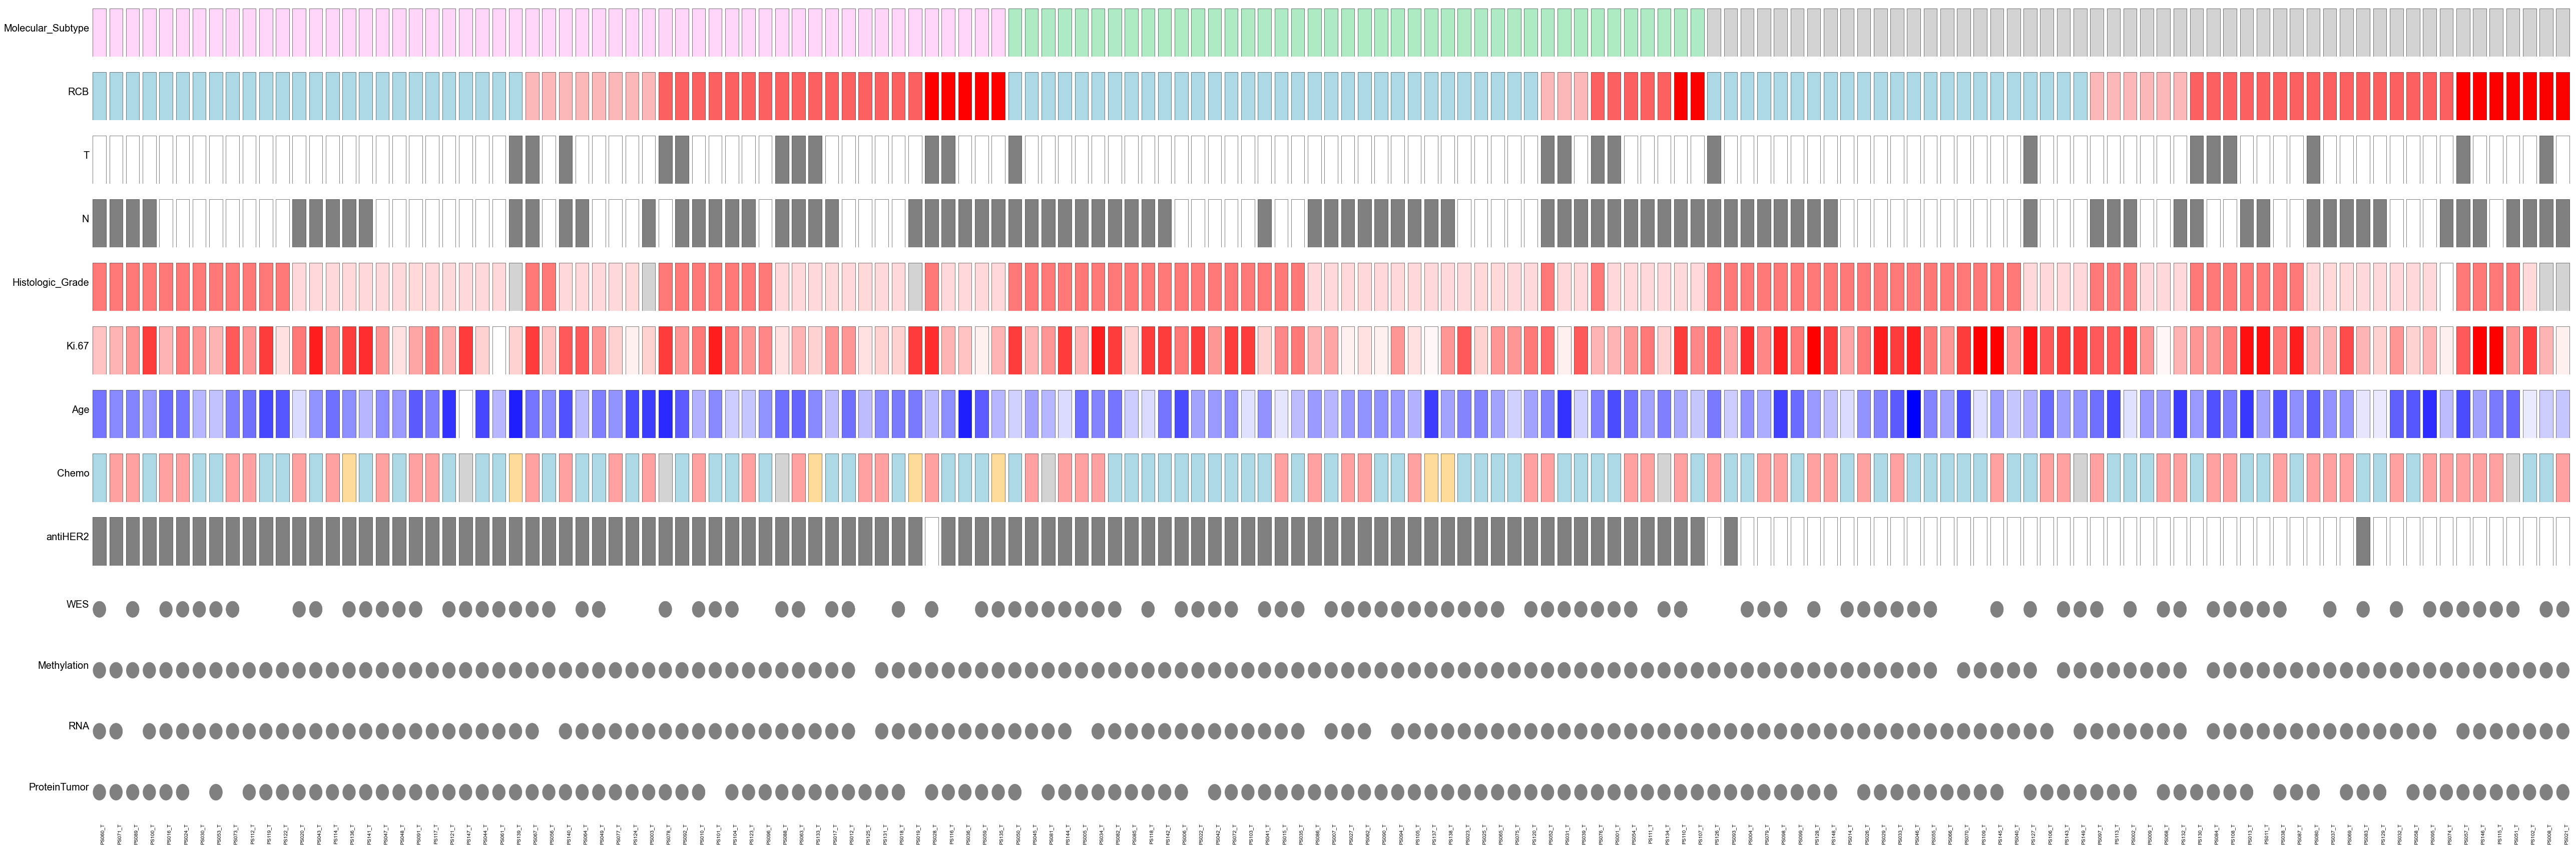

In [13]:
# Clinical
cdf1 = colorDf(df_toshow[['Molecular_Subtype']].T,colorDict = {'PosPos':'#ffd6fa','NegPos':'#aeebc5','NegNeg':'lightgrey'})

# pCR
cdf5 = colorDf(df_toshow[['RCB']].T,colorDict = {'0':'lightblue','1':'#fcb8b8','2':'#fc6060','3':'#fc0000',})

# Pathology
cdf7 = colorDf(df_toshow[['Histologic_Grade']].T,colorDict = {'-1':'lightgray','I':'white','II':'#ffd9d9','III':'#ff7878'})
cdf8 = colorDf(df_toshow[['T']].T,colorDict = \
               {'-1':'lightgray','Tis':'white','T1':'white','T1b':'white','T1c':'white','T2':'white','T3':'gray','T4':'gray'})
cdf9 = colorDf(df_toshow[['N']].T,colorDict = \
               {'-1':'lightgray','N0':'white','N1':'gray','N2':'gray','N3':'gray','N3c':'gray'})
cdf10 = colorDf(df_toshow[['Ki.67']].T,colorDict = cColorDict(df_toshow['Ki.67'], 'r'))
cdf11 = colorDf(df_toshow[['Age']].T,colorDict = cColorDict(df_toshow['Age'], 'b', True))

# Drug
from collections import defaultdict
a = {'TCb':'lightblue', 'EC-T':'#ffa1a1', 'TY':'#ffdb99', 'Others':'lightgray'}
cdf12 = colorDf(df_toshow[['Chemo']].T,colorDict = a)

a = {'1':'gray', '0':'white'}
cdf13 = colorDf(df_toshow[['antiHER2']].T,colorDict = a)

# Omics
cdf14 = colorDf(df_toshow[['WES','Methylation','RNA','ProteinTumor']].T,colorDict = 'round')

label_size = 10

mpl.rcParams['font.family'] = 'arial'
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size*2

multiLandscape([cdf1, cdf5, \
                cdf8, cdf9, cdf7, cdf10, cdf11, cdf12, cdf13, cdf14,],(90,30))


plt.savefig('Figure.1B.clinical-pinfo.pdf', bbox_inches='tight')